In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, utils
import torchvision
import matplotlib.pyplot as plt
import numpy as np
import natsort
from PIL import Image
from torch.utils.data import Dataset, DataLoader
import glob
# function to count number of parameters
def get_n_params(model):
    np=0
    for p in list(model.parameters()):
        np += p.nelement()
    return np

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [15]:
class CustomDataSet(Dataset):
    def __init__(self, main_dir, transform):
        self.main_dir = main_dir
        self.transform = transform
        all_imgs = os.listdir(main_dir)
        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        img_loc = os.path.join(self.main_dir, self.total_imgs[idx])
        img_file = glob.glob(f"{img_loc}/*")
        image = Image.open(img_file[0]).convert("RGB")
        tensor_image = self.transform(image)
        label = float(self.total_imgs[idx])
        return tensor_image, label

In [6]:
.8816

"\nres = 128\ninput_dim = (res,res)\ninput_size  = res*res   # images are 32x32 pixels\noutput_size = 8      # there are 10 classes\n\ndef load_train_dataset():\n    data_path = 'E:/Users/spectR/Desktop/%projects/mlai/tai wai/XY_data/XY_samples/'\n    train_dataset = torchvision.datasets.ImageFolder(\n        root=data_path,\n        transform=torchvision.transforms.Compose([\n            transforms.Resize(input_dim),\n            transforms.ToTensor()\n            ])\n    )\n    train_loader = torch.utils.data.DataLoader(\n        train_dataset,\n        batch_size=1,\n        num_workers=0,\n        shuffle=True\n    )\n    return train_loader\n\ndef load_test_dataset():\n    data_path = 'E:/Users/spectR/Desktop/%projects/mlai/tai wai/IsingML/test/'\n    test_dataset = torchvision.datasets.ImageFolder(\n        root=data_path,\n        transform=torchvision.transforms.Compose([\n            transforms.Resize(input_dim),\n            transforms.ToTensor()\n            ])\n    )\n    t

In [25]:

res = 128
crop_size = 32
input_dim = (res,res)
input_size  = crop_size*crop_size   # images are 32x32 pixels
output_size = 1      # there are 10 classes

data_path = 'E:/Users/spectR/Desktop/%projects/mlai/tai wai/XY_data/XY_samples/'
dataset_all = CustomDataSet(
    main_dir=data_path,
    transform=torchvision.transforms.Compose([
        transforms.CenterCrop(crop_size),
        transforms.Resize((crop_size,crop_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
        ])
)
dataset_size = len(dataset_all)
train_size = int(0.8 * dataset_size)
test_size = dataset_size - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset_all, [train_size, test_size])

def load_train_dataset():   
    train_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size=32,
        num_workers=0,
        shuffle = True
    )
    return train_loader
def load_test_dataset():   
    test_loader = torch.utils.data.DataLoader(
        test_dataset,
        batch_size=32,
        num_workers=0,
        shuffle = True
    )
    return test_loader

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

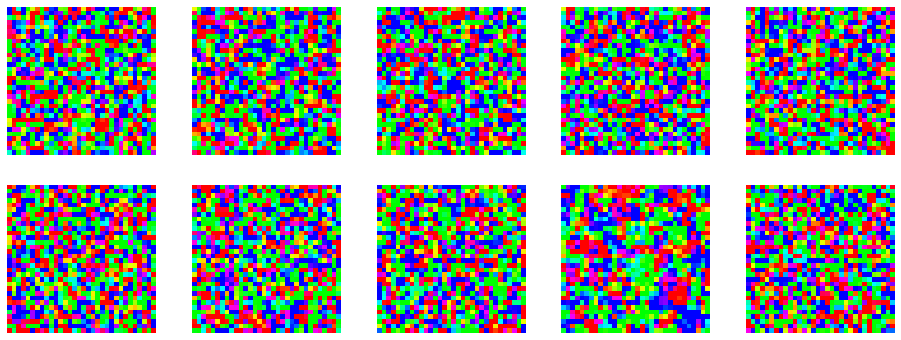

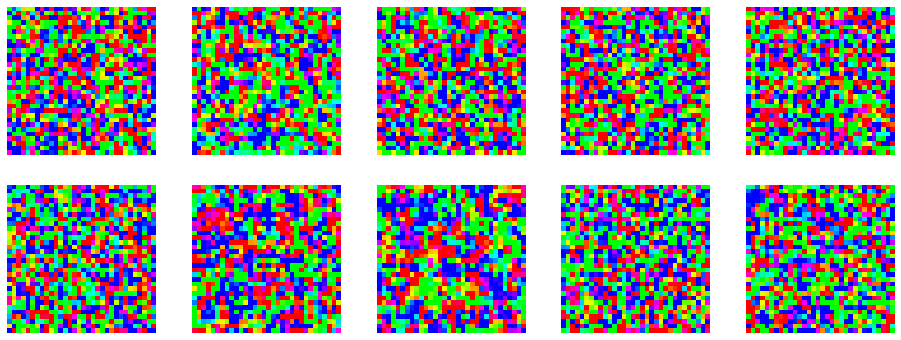

In [5]:
# show some images
plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = (load_train_dataset()).dataset.__getitem__(i)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.axis('off');

plt.figure(figsize=(16, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    image, _ = (load_test_dataset()).dataset.__getitem__(i)
    plt.imshow(image.permute(1, 2, 0).numpy())
    plt.axis('off');


In [6]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=3)
        self.batchnorm = nn.BatchNorm2d(n_feature)
        self.fc1 = nn.Linear(n_feature*15*15, 1)
        #self.fc2 = nn.Linear(12, 1)
        self.predict = nn.ReLU()
        
    def forward(self, x, verbose=True):
        # F here is the library of functionals
        x = self.conv1(x)
        x = self.batchnorm(x)
        x = F.relu(x)
        x = x.view(-1, self.n_feature*15*15)
        x = self.fc1(x)
        x = F.relu(x)
        x = F.dropout(x, p = 0.2)
        x = self.predict(x)
        return x


In [19]:
class CNN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(CNN, self).__init__()
        self.n_feature = n_feature
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=n_feature, kernel_size=5)
        self.conv2 = nn.Conv2d(n_feature, n_feature, kernel_size=5)
        self.fc1 = nn.Linear(n_feature*5*5, 50)
        self.fc2 = nn.Linear(50, 1)
        
    def forward(self, x, verbose=False):
        # F here is the library of functionals
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, kernel_size=2)
        x = x.view(-1, self.n_feature*5*5)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        #x = F.relu(x)
        return x

In [28]:
class NN(nn.Module):
    def __init__(self, input_size, n_feature, output_size):
        super(NN, self).__init__()
        self.n_feature = n_feature
        self.input_size = input_size
        self.fc1 = nn.Linear(self.input_size*3, 1)
        #self.fc2 = nn.Linear(n_feature*10*10, n_feature)
        #self.fc3 = nn.Linear(n_feature, 1)
    def forward(self, x, verbose = True):
        x = x.view(-1, 3*self.input_size)
        x = self.fc1(x)
        #x = self.fc2(x)
        #x = self.fc3(x)
        x = torch.sigmoid(x)
        return x

In [23]:
accuracy_list = []

def sigmoidLoss(output,target):
    loss = torch.nn.Sigmoid()
    return abs(2*loss(output)-target)

def train(epoch, model):
    model.train()
    for batch_idx, (data, target) in enumerate(load_train_dataset()):
        # send to device
        data, target = data.to(device), target.to(device)
        #print(data,target)
        target = target.to(torch.float32)
        target = target.view(-1,1)
        optimizer.zero_grad()
        output = model(data)
        #print("OUTPUT: ",output, "\nTARGET: ", target,"\n\n")
        #print("output",output)
        #loss = sigmoidLoss(output, target)
        loss = F.mse_loss(output, target)
        #print(loss)
        loss.sum().backward()
        optimizer.step()
        
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(load_train_dataset().dataset),
                100. * batch_idx / len(load_train_dataset()), loss.item()))
      

def test(model):
    model.eval()
    test_loss = 0
    correct = 0
    for data, target in load_test_dataset():
        # send to device
        data, target = data.to(device), target.to(device)
        
        target = target.to(torch.float32)
        target = target.view(-1,1)
        output = model(data) 
        #test_loss += sigmoidLoss(output, target).item()
        test_loss += F.mse_loss(output, target, reduction='sum').item() # sum up batch loss                                                               
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability                                                                 
        correct += pred.eq(target.data.view_as(pred)).cpu().sum().item()

    test_loss /= len(load_test_dataset().dataset)
    accuracy = 100. * correct / len(load_test_dataset().dataset)
    accuracy_list.append(accuracy)
    
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(load_test_dataset().dataset),
        accuracy))
    
    

In [30]:
# Training settings CNN
n_features = 16 # number of feature maps
print(input_size, output_size)
model_cnn = CNN(input_size, n_features, output_size)
model_cnn.to(device)
optimizer = optim.Adadelta(model_cnn.parameters(), lr=0.001)
print('Number of parameters: {}'.format(get_n_params(model_cnn)))

print(model_cnn)
for epoch in range(0, 2000):
    train(epoch, model_cnn)
    test(model_cnn)



8 (0%)

Train Epoch: 1804 [0/1591 (0%)]	Loss: 0.009263

Test set: Average loss: 0.0480, Accuracy: 0/398 (0%)

Train Epoch: 1805 [0/1591 (0%)]	Loss: 0.007566

Test set: Average loss: 0.0484, Accuracy: 0/398 (0%)

Train Epoch: 1806 [0/1591 (0%)]	Loss: 0.014146

Test set: Average loss: 0.0480, Accuracy: 0/398 (0%)

Train Epoch: 1807 [0/1591 (0%)]	Loss: 0.007152

Test set: Average loss: 0.0485, Accuracy: 0/398 (0%)

Train Epoch: 1808 [0/1591 (0%)]	Loss: 0.012867

Test set: Average loss: 0.0481, Accuracy: 0/398 (0%)

Train Epoch: 1809 [0/1591 (0%)]	Loss: 0.012995

Test set: Average loss: 0.0484, Accuracy: 0/398 (0%)

Train Epoch: 1810 [0/1591 (0%)]	Loss: 0.009995

Test set: Average loss: 0.0480, Accuracy: 0/398 (0%)

Train Epoch: 1811 [0/1591 (0%)]	Loss: 0.008145

Test set: Average loss: 0.0481, Accuracy: 0/398 (0%)

Train Epoch: 1812 [0/1591 (0%)]	Loss: 0.011484

Test set: Average loss: 0.0480, Accuracy: 0/398 (0%)

Train Epoch: 1813 [0/1591 (0%)]	Loss: 0.008637

Test set: Average loss: 0.

In [29]:
# Training settings NN
n_features = 16 # number of feature maps
print(input_size, output_size)
model_nn = NN(input_size, n_features, output_size)
model_nn.to(device)
optimizer = optim.Adadelta(model_nn.parameters(), lr=0.001)
print('Number of parameters: {}'.format(get_n_params(model_nn)))

print(model_nn)
for epoch in range(0, 2000):
    train(epoch, model_nn)
    test(model_nn)


8 (0%)

Train Epoch: 1804 [0/1591 (0%)]	Loss: 0.200653

Test set: Average loss: 0.5485, Accuracy: 0/398 (0%)

Train Epoch: 1805 [0/1591 (0%)]	Loss: 0.231414

Test set: Average loss: 0.5485, Accuracy: 0/398 (0%)

Train Epoch: 1806 [0/1591 (0%)]	Loss: 0.255969

Test set: Average loss: 0.5485, Accuracy: 0/398 (0%)

Train Epoch: 1807 [0/1591 (0%)]	Loss: 0.257123

Test set: Average loss: 0.5485, Accuracy: 0/398 (0%)

Train Epoch: 1808 [0/1591 (0%)]	Loss: 0.171153

Test set: Average loss: 0.5486, Accuracy: 0/398 (0%)

Train Epoch: 1809 [0/1591 (0%)]	Loss: 0.224469

Test set: Average loss: 0.5486, Accuracy: 0/398 (0%)

Train Epoch: 1810 [0/1591 (0%)]	Loss: 0.339438

Test set: Average loss: 0.5486, Accuracy: 0/398 (0%)

Train Epoch: 1811 [0/1591 (0%)]	Loss: 0.231569

Test set: Average loss: 0.5486, Accuracy: 0/398 (0%)

Train Epoch: 1812 [0/1591 (0%)]	Loss: 0.169943

Test set: Average loss: 0.5486, Accuracy: 0/398 (0%)

Train Epoch: 1813 [0/1591 (0%)]	Loss: 0.396317

Test set: Average loss: 0.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

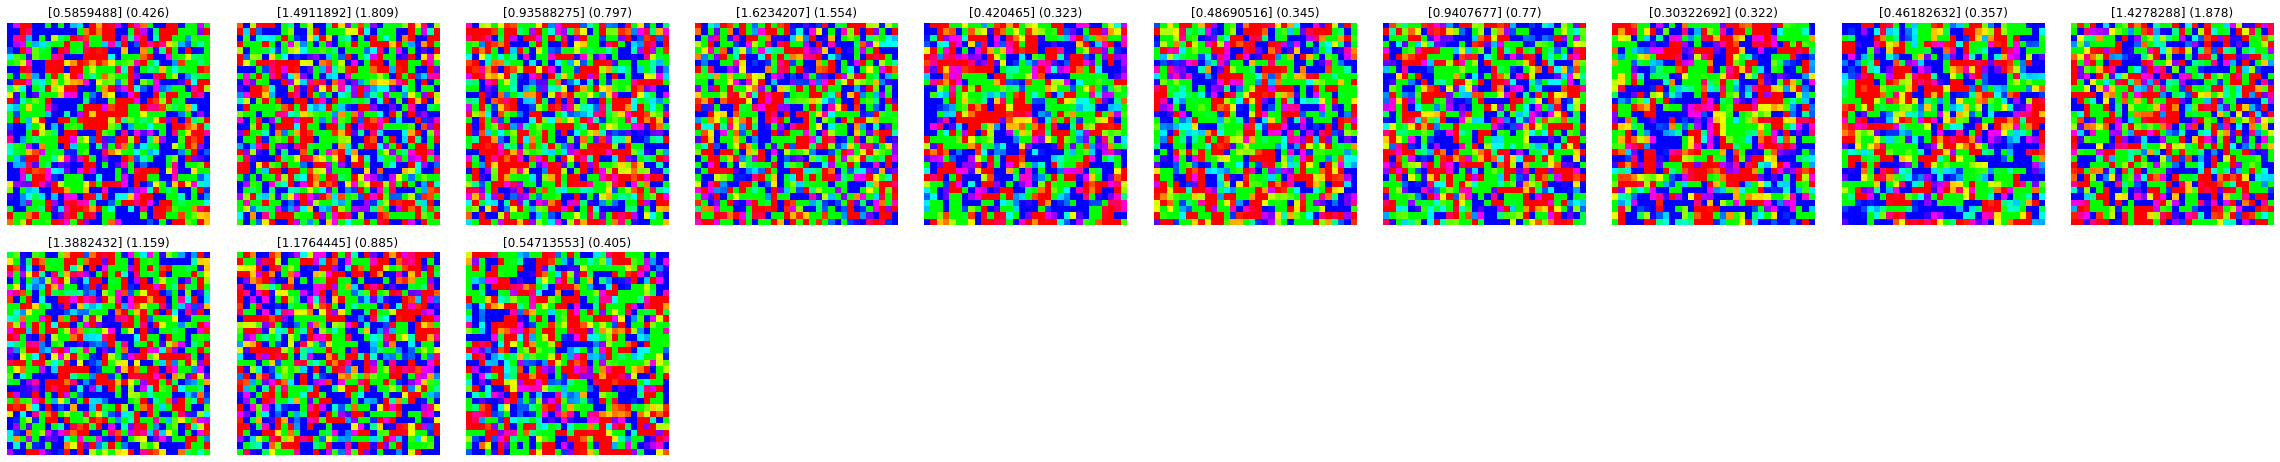

In [44]:
#categories = ['.001', '.005', '.01', '.05', '.1', '.5', '1', '5']

def show_predictions(rows=10, columns = 10):
    y_pred = []
    y_true = []
    x = []
    maxtoshow = rows * columns
    
    i = 0
    for data, target in load_test_dataset():
        if i>=maxtoshow:
            break
        data, target = data.to(device), target.to(device)
        output = model_cnn(data)
        #print(f'Predicted: {output[0]} \nActual: {target[0]} \nDifference: {np.abs(output.data.cpu().numpy()[0] - target.data.cpu().numpy()[0])}')
        #print(output[0])
        pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(pred[0])
        #print(target[0])
        x.append(data.view(-1,3,32,32)[0].permute(1, 2, 0).cpu())
        y_pred.append(output.data.cpu().numpy())
        y_true.append(target.data.cpu().numpy())
        i = i + 1
        

    ii = 0
    plt.figure(figsize=(32, 32))
    for i in range(len(x)):
        if ii>=maxtoshow:
            break
        plt.subplot(rows, columns, ii+1)
        plt.axis('off')
        plt.imshow(x[i].numpy())
        plt.title("%s (%s)" % (y_pred[i][0], y_true[i][0]))
        ii = ii + 1
    plt.tight_layout()

show_predictions()

In [35]:
PATH = "cnn_model1.pth"
torch.save(model_cnn.state_dict(), PATH)

In [ ]:

def eval(path, v = False):
    model = CNN(input_size, n_features, output_size)  # Initialize model
    model.load_state_dict(torch.load(PATH))  # Load pretrained parameters
    model.eval()  # Set to eval mode to change behavior of Dropout, BatchNorm

    transform = torchvision.transforms.Compose([
        transforms.CenterCrop(crop_size),
        transforms.Resize((crop_size,crop_size)),
        transforms.ToTensor(),
        transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
        ])  # Same as for your validation data, e.g. Resize, ToTensor, Normalize, ...

    img = Image.open(path)  # Load image as PIL.Image
    x = transform(img)  # Preprocess image
    #x = x.to(device)
    x = x.unsqueeze(0)  # Add batch dimension

    output = model(x)  # Forward pass
    #print(output)
    pred = torch.argmax(output, 1)  # Get predicted class if multi-class classification

    if torch.tensor([1]).eq(pred):
        if v:
            print('Image predicted as Down')
        return (1, output)
    else:
        if v:
            print('Image predicted as Up')
        return (0, output)


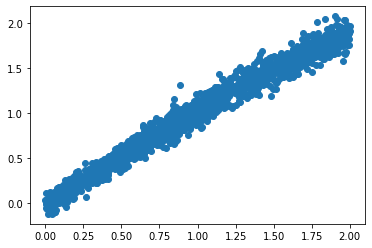

In [63]:
def scatter_predictions():
    y_pred = []
    y_true = []
    diff = []
    x = []

    for data, target in load_train_dataset():
        data, target = data.to(device), target.to(device)
        output = model_cnn(data)
        #print(f'Predicted: {output[0]} \nActual: {target[0]} \nDifference: {np.abs(output.data.cpu().numpy()[0] - target.data.cpu().numpy()[0])}')
        #print(output[0])
        #pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
        #print(pred[0])
        #print(target[0])
        #x.append(data.view(-1,3,32,32)[0].permute(1, 2, 0).cpu())
        #print((output.data.cpu().numpy()))
        y_pred.extend((output.data.cpu().numpy()))
        y_true.extend((target.data.cpu().numpy()))
        diff.append(np.abs(y_pred[-1]-y_true[-1]))

    plt.scatter(y_true, y_pred)
    #plt.scatter(y_true, diff)
    plt.show()

scatter_predictions()